In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import plotly.express as px
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import acorr_breusch_godfrey, het_breuschpagan
from scipy.stats import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/My Drive/TimeSeries/timeseries5.csv')

#Data Description

In [ ]:
data.head()

,Date,Regulatory capital to risk-weighted assets,Reg capital to risk-weighted assets_gr,Liquid assets to total assets,Liquid assets to total assets_gr,Liquid assets to short-term liabilities,Liquid assets to short-term liabilities_gr,Total Assets,Total Liabilities,Total Capital,...,RUB_AMD_NGR,RUB_AMD_RGR,REM_GR,REM_RUS_GR,FAO_GR,Import_gr,usd_amd_gr,eur_usd_gr,usd_rub_gr,invest_gr
0,2013Q1,16.38,-0.794,26.10,0.728,136.09,NaN,2 570 014 235,2 164 579 835,405 434 400,...,95.9,92.2,108.7,108.5,-1.1,101.0,105,100.7,100.8,96
1,2013Q2,16.25,-0.794,26.10,0.000,127.12,-6.591,2 640 730 800,2 227 541 500,413 189 300,...,98.6,96.8,111.8,113.0,1.8,90.0,103,101.8,101.9,86
2,2013Q3,16.54,1.785,26.29,0.728,136.87,7.670,2 718 160 132,2 289 427 000,428 733 132,...,103.1,105.3,110.6,110.8,-5.5,95.0,100,106.0,102.5,88
3,2013Q4,16.69,0.907,29.12,10.765,142.31,3.975,2 943 734 392,2 487 701 871,456 032 521,...,105.1,105.1,111.5,112.4,-4.0,98.0,100,104.9,104.7,93
4,2014Q1,16.36,-1.977,29.56,1.511,145.58,2.298,2 926 167 878,2 460 129 556,466 038 323,...,115.0,113.0,106.1,105.0,-3.4,94.0,100,103.6,115.4,106


In [ ]:
data['Date'] = data['Date '].str.strip() \
                           .str.replace('Q1', '-01-01') \
                           .str.replace('Q2', '-04-01') \
                           .str.replace('Q3', '-07-01') \
                           .str.replace('Q4', '-10-01')

data['Date'] = pd.to_datetime(data['Date'])

data.set_index('Date', inplace=True)
data.sort_index(inplace=True)
data.drop(columns=['Date '], inplace=True)

In [ ]:
data.head()

,Regulatory capital to risk-weighted assets,Reg capital to risk-weighted assets_gr,Liquid assets to total assets,Liquid assets to total assets_gr,Liquid assets to short-term liabilities,Liquid assets to short-term liabilities_gr,Total Assets,Total Liabilities,Total Capital,Current period retained earnings/Loss,...,RUB_AMD_NGR,RUB_AMD_RGR,REM_GR,REM_RUS_GR,FAO_GR,Import_gr,usd_amd_gr,eur_usd_gr,usd_rub_gr,invest_gr
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,16.38,-0.794,26.10,0.728,136.09,NaN,2 570 014 235,2 164 579 835,405 434 400,4 085 844,...,95.9,92.2,108.7,108.5,-1.1,101.0,105,100.7,100.8,96
2013-04-01,16.25,-0.794,26.10,0.000,127.12,-6.591,2 640 730 800,2 227 541 500,413 189 300,12 382 498,...,98.6,96.8,111.8,113.0,1.8,90.0,103,101.8,101.9,86
2013-07-01,16.54,1.785,26.29,0.728,136.87,7.670,2 718 160 132,2 289 427 000,428 733 132,24 744 635,...,103.1,105.3,110.6,110.8,-5.5,95.0,100,106.0,102.5,88
2013-10-01,16.69,0.907,29.12,10.765,142.31,3.975,2 943 734 392,2 487 701 871,456 032 521,37 928 881,...,105.1,105.1,111.5,112.4,-4.0,98.0,100,104.9,104.7,93
2014-01-01,16.36,-1.977,29.56,1.511,145.58,2.298,2 926 167 878,2 460 129 556,466 038 323,7 781 218,...,115.0,113.0,106.1,105.0,-3.4,94.0,100,103.6,115.4,106


In [ ]:
def clean_numeric(col):
    return data[col].astype(str) \
        .str.replace(r'[^\d,.-]', '', regex=True) \
        .str.replace(',', '.', regex=False) \
        .astype(float)

data['Total Assets'] = clean_numeric('Total Assets')
data['Total Liabilities'] = clean_numeric('Total Liabilities')

In [ ]:
data['log_assets'] = np.log(data['Total Assets'])
data['asset_returns'] = data['log_assets'].diff()
data['sigma_A'] = data['asset_returns'].rolling(window=4).std()

In [ ]:
data['DD'] = (data['Total Assets'] - data['Total Liabilities']) / data['sigma_A']
data['DD_log'] = (np.log(data['Total Assets']) - np.log(data['Total Liabilities'])) / data['sigma_A']

In [ ]:
data = data.dropna(subset=['DD', 'DD_log'])

In [ ]:
data.head()

,Regulatory capital to risk-weighted assets,Reg capital to risk-weighted assets_gr,Liquid assets to total assets,Liquid assets to total assets_gr,Liquid assets to short-term liabilities,Liquid assets to short-term liabilities_gr,Total Assets,Total Liabilities,Total Capital,Current period retained earnings/Loss,...,Import_gr,usd_amd_gr,eur_usd_gr,usd_rub_gr,invest_gr,log_assets,asset_returns,sigma_A,DD,DD_log
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01,16.36,-1.977,29.56,1.511,145.58,2.298,2.926168e+09,2.460130e+09,466 038 323,7 781 218,...,94.0,100,103.6,115.4,106,21.796960,-0.005985,0.035369,1.317657e+10,4.904891
2014-04-01,16.17,-1.161,27.49,-7.003,135.12,-7.185,2.923077e+09,2.449939e+09,473 138 178,18 509 468,...,100.0,100,105.0,110.5,107,21.795903,-0.001057,0.039363,1.201990e+10,4.485792
2014-07-01,16.25,0.495,26.69,-2.910,133.23,-1.399,2.959107e+09,2.477561e+09,481 546 499,25 133 865,...,104.0,100,100.0,110.4,94,21.808153,0.012251,0.039747,1.211523e+10,4.468570
2014-10-01,14.50,-10.769,25.12,-5.882,129.37,-2.897,3.410923e+09,2.941803e+09,469 119 818,21 195 062,...,89.0,106,91.6,146.2,92,21.950249,0.142095,0.070601,6.644673e+09,2.095727
2015-01-01,15.11,4.207,24.11,-4.021,137.06,5.944,3.264759e+09,2.790062e+09,474 696 684,(3 923 123),...,84.0,116,82.4,180.6,104,21.906452,-0.043797,0.080132,5.923956e+09,1.960797


In [ ]:
def classify_log(dd_log):
    if dd_log < 0:
        return "Defaulted"
    elif dd_log < 2:
        return "High Risk"
    elif dd_log < 4:
        return "Moderate Risk"
    else:
        return "Low Risk"

In [ ]:
data["RiskLevel_log"] = data["DD_log"].apply(classify_log)

In [ ]:
risk_mapping = {
    "Defaulted": 0,
    "High Risk": 1,
    "Moderate Risk": 2,
    "Low Risk": 3
}
data["RiskLevel_num"] = data["RiskLevel_log"].map(risk_mapping)
data[[ "DD_log", "RiskLevel_log"]].head()

,DD_log,RiskLevel_log
Date,,
2014-01-01,4.904891,Low Risk
2014-04-01,4.485792,Low Risk
2014-07-01,4.468570,Low Risk
2014-10-01,2.095727,Moderate Risk
2015-01-01,1.960797,High Risk


In [ ]:
color_map = {
    "Defaulted":"#ff7f0e",
    "High Risk":  "#d62728",
    "Moderate Risk": "#1f77b4",
    "Low Risk": "#2ca02c"
}

In [ ]:
fig = px.line(
    data.reset_index(),
    x="Date",
    y="RiskLevel_log",
    color="RiskLevel_log",
    color_discrete_map=color_map,
    markers=True,
    line_shape="linear",
    title="Bank Risk Category Over Time Based on Distance to Default"
)

fig.update_traces(marker=dict(size=9, line=dict(width=1, color='black')))

fig.update_layout(
    yaxis=dict(
        title="Risk Category",
        categoryorder="array",
        categoryarray=["Defaulted", "High Risk", "Moderate Risk", "Low Risk"],
        tickfont=dict(size=12),
    ),
    xaxis=dict(
        title="Date",
        tickfont=dict(size=11)
    ),
    legend_title_text='Risk Level',
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=1.02,
        font=dict(size=12)
    ),
    font=dict(family="Arial", size=13),
    plot_bgcolor="white",
    height=500,
    margin=dict(l=40, r=40, t=60, b=40)
)

fig.show()

In [ ]:
snapshot1 = data.loc['2015-01-01', ['GDP_gr', 'cpi_inf_arm', 'reer_gr', 'export_gr_nr', 'REM_GR', 'usd_amd_gr']]
snapshot2 = data.loc['2020-01-01', ['GDP_gr', 'cpi_inf_arm', 'reer_gr', 'export_gr_nr', 'REM_GR', 'usd_amd_gr']]

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=snapshot1.values,
    theta=snapshot1.index,
    fill='toself',
    name='2015',
    line=dict(color='rgb(0, 56, 168)'),
    fillcolor='rgba(0, 56, 168, 0.3)'
))

fig.add_trace(go.Scatterpolar(
    r=snapshot2.values,
    theta=snapshot2.index,
    fill='toself',
    name='2020',
    line=dict(color='rgb(211, 0, 47)'),
    fillcolor='rgba(211, 0, 47, 0.3)'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(visible=True, linewidth=1, showline=True, gridcolor='lightgray')
    ),
    title="Macro Stability Snapshot",
    showlegend=True,
    plot_bgcolor="white"
)

fig.show()

In [ ]:
external_data = data.reset_index()[["Date", "usd_amd_gr", "reer_gr", "REM_GR"]]
melted = external_data.melt(id_vars="Date", var_name="Indicator", value_name="Growth Rate")

melted["Size"] = melted["Growth Rate"].abs()

custom_colors = {
    "usd_amd_gr": 'rgb(0, 56, 168)',
    "reer_gr": 'rgb(211, 0, 47)',
    "REM_GR": 'rgb(0, 100, 0)'
}

fig = px.scatter(
    melted,
    x="Date", y="Growth Rate",
    size="Size",
    color="Indicator",
    color_discrete_map=custom_colors,
    title="FX, REER & Remittances Over Time",
    labels={"Growth Rate": "Growth Rate (%)"},
    hover_name="Indicator",
    size_max=25
)

fig.update_layout(plot_bgcolor="white")
fig.show()

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=data.index,
    y=data["Total_loan_gr"],
    name="Loan Growth (%)",
    mode='lines',
    fill='tozeroy',
    line=dict(color='rgb(0, 56, 168)', width=2),
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=data.index,
    y=data["DD_log"],
    name="Distance to Default (log)",
    mode='lines+markers',
    line=dict(color='rgb(211, 0, 47)', width=2),
    yaxis='y2'
))

fig.update_layout(
    title="Loan Growth vs. Distance to Default Over Time",
    xaxis=dict(title="Date"),
    yaxis=dict(
        title="Loan Growth (%)",
        titlefont=dict(color='rgb(0, 13, 1)'),
        tickfont=dict(color='rgb(0, 13, 1)')
    ),
    yaxis2=dict(
        title="Distance to Default (log)",
        titlefont=dict(color='rgb(0, 13, 1)'),
        tickfont=dict(color='rgb(0, 13, 1)'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.01, y=0.99),
    plot_bgcolor="white",
    height=500
)

fig.show()

# Regression


##Model 1

In [ ]:
print(data.columns.tolist())

['Regulatory capital to risk-weighted assets     ', 'Reg capital to risk-weighted assets_gr     ', 'Liquid assets to total assets     ', 'Liquid assets to total assets_gr     ', 'Liquid assets to short-term liabilities     ', 'Liquid assets to short-term liabilities_gr     ', 'Total Assets', 'Total Liabilities', 'Total Capital', 'Current period retained earnings/Loss ', 'Previous period retained earnings/Loss ', 'Rus_gdp_gr', 'EU_gdp_gr', 'China_gdp_gr', 'US_gdp_gr', 'foreign gdp_gr', 'cpi_inf_arm', 'reer_gr', 'GDP_gr', 'Total_loan_gr', 'repo', 'export_gr_nr', 'RUB_AMD_NGR', 'RUB_AMD_RGR', 'REM_GR', 'REM_RUS_GR', 'FAO_GR', 'Import_gr', 'usd_amd_gr', 'eur_usd_gr', 'usd_rub_gr', 'invest_gr', 'log_assets', 'asset_returns', 'sigma_A', 'DD', 'DD_log', 'RiskLevel_log', 'RiskLevel_num']


In [ ]:
features = [
    'Regulatory capital to risk-weighted assets     ',
    'Liquid assets to short-term liabilities     ',
    'Total_loan_gr',
    'GDP_gr',
    'cpi_inf_arm',
    'reer_gr',
    'export_gr_nr',
    'repo',
    'REM_GR',
    'usd_amd_gr'

]

In [ ]:
data.columns = data.columns.str.strip()

In [ ]:
features = [
    'Regulatory capital to risk-weighted assets',
    'Liquid assets to short-term liabilities',
    'Total_loan_gr',
    'GDP_gr',
    'cpi_inf_arm',
    'export_gr_nr',
    'reer_gr',
    'repo',
    'REM_GR',
    'usd_amd_gr'
]

In [ ]:
def clean_numeric(col):
    return col.astype(str) \
              .str.replace('%', '', regex=False) \
              .str.replace(',', '.', regex=False) \
              .str.replace(r'[^\d.\-]', '', regex=True) \
              .replace('', np.nan) \
              .astype(float)

In [ ]:
def clean_numeric(col):
    return col.astype(str) \
              .str.replace(r'[^\d.\-]', '', regex=True) \
              .replace('', np.nan) \
              .astype(float)

for col in features + ['DD_log']:
    data[col] = clean_numeric(data[col])

In [ ]:
min_rows = 20
valid_features = [col for col in features if data[col].notna().sum() >= min_rows]
print("Valid features:", valid_features)

Valid features: ['Regulatory capital to risk-weighted assets', 'Liquid assets to short-term liabilities', 'Total_loan_gr', 'GDP_gr', 'cpi_inf_arm', 'export_gr_nr', 'reer_gr', 'repo', 'REM_GR', 'usd_amd_gr']


In [ ]:
for col in valid_features + ['DD_log']:
    data[col] = clean_numeric(data[col])

In [ ]:
model_data = data[valid_features + ['DD_log']].dropna()

In [ ]:
X = model_data[valid_features].astype(float)
X = sm.add_constant(X)
y = model_data['DD_log'].astype(float)

In [ ]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DD_log   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     2.757
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0160
Time:                        14:48:28   Log-Likelihood:                -110.87
No. Observations:                  40   AIC:                             243.7
Df Residuals:                      29   BIC:                             262.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

##Model 2

In [ ]:
data['Total Assets'] = clean_numeric(data['Total Assets'])
data['Total Capital'] = clean_numeric(data['Total Capital'])
data['Current period retained earnings/Loss'] = clean_numeric(data['Current period retained earnings/Loss'])
data['ROA'] = data['Current period retained earnings/Loss'] / data['Total Assets']
data['ROE'] = data['Current period retained earnings/Loss'] / data['Total Capital']
data['ROA_gr'] = data['ROA'].pct_change() * 100
data['ROE_gr'] = data['ROE'].pct_change() * 100

In [ ]:
data['Regulatory_capital_gr'] = data['Regulatory capital to risk-weighted assets'].pct_change() * 100
data['Liquidity_ratio_gr'] = data['Liquid assets to short-term liabilities'].pct_change() * 100

In [ ]:
data['Year'] = data.index.year
data['RussianCrisis'] = data['Year'].apply(lambda x: 1 if x in [2014, 2015] else 0)
data['COVID'] = data['Year'].apply(lambda x: 1 if x in [2020, 2021] else 0)

In [ ]:
threshold = 7

data['FX_Shock'] = data['usd_amd_gr'].apply(lambda x: 1 if x >= threshold else 0)

In [ ]:
loan_threshold = 15

data['Loan_Shock'] = data['Total_loan_gr'].apply(lambda x: 1 if x >= loan_threshold else 0)

In [ ]:
revised_features = [
    'Total_loan_gr',
    'GDP_gr',
    'cpi_inf_arm',
    'repo',
    'export_gr_nr',
    'ROE_gr',
    'ROA_gr',
    'Liquidity_ratio_gr',
    'Regulatory_capital_gr',
    'usd_amd_gr',
    'RussianCrisis',
    'COVID',
    'FX_Shock',
    'Loan_Shock'

]

In [ ]:
model_data = data[revised_features + ['DD_log']].dropna()

X = model_data[revised_features].astype(float)
X = sm.add_constant(X)
y = model_data['DD_log'].astype(float)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DD_log   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     2.899
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0108
Time:                        14:48:28   Log-Likelihood:                -103.61
No. Observations:                  39   AIC:                             235.2
Df Residuals:                      25   BIC:                             258.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Total_loan_gr            -0.37

<Figure size 800x400 with 0 Axes>

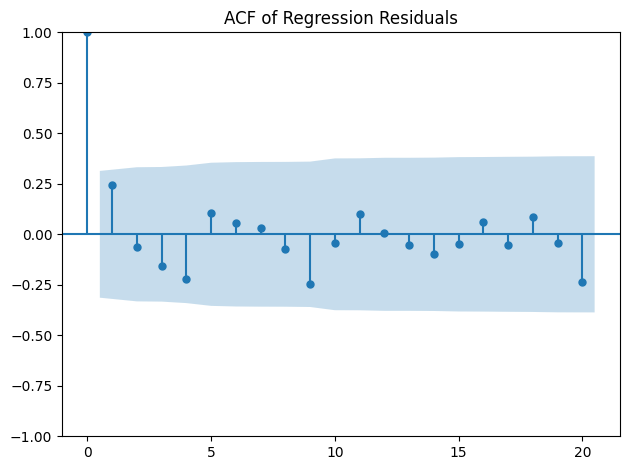

In [ ]:
residuals = model.resid

plt.figure(figsize=(8,4))
plot_acf(residuals, lags=20)
plt.title("ACF of Regression Residuals")
plt.tight_layout()
plt.show()

In [ ]:
bg_test = acorr_breusch_godfrey(model, nlags=4)
print(f"\nBreusch-Godfrey test: LM statistic = {bg_test[0]:.4f}, p-value = {bg_test[1]:.4f}")


Breusch-Godfrey test: LM statistic = 8.0924, p-value = 0.0882


In [ ]:
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF results:")
print(vif_data)


VIF results:
                  feature          VIF
0           Total_loan_gr     4.363946
1                  GDP_gr     3.517240
2             cpi_inf_arm     2.695212
3                    repo     2.492149
4            export_gr_nr     2.435084
5                  ROE_gr   609.228854
6                  ROA_gr   625.796523
7      Liquidity_ratio_gr     1.919588
8   Regulatory_capital_gr     2.864983
9              usd_amd_gr     2.821031
10          RussianCrisis     3.252511
11                  COVID     3.863214
12               FX_Shock  3032.021079
13             Loan_Shock     3.530503


In [ ]:
jb_stat, jb_pvalue = jarque_bera(model.resid)
print(f"\nJarque-Bera test: JB statistic = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")


Jarque-Bera test: JB statistic = 1.8847, p-value = 0.3897


##Model 3

In [ ]:
revised_features1 = [
    'Total_loan_gr',
    'GDP_gr',
    'cpi_inf_arm',
    'export_gr_nr',
    'Liquidity_ratio_gr',
    'usd_amd_gr',
    'RussianCrisis',
    'COVID',

    ]

In [ ]:
model_data = data[revised_features1 + ['DD_log']].dropna()

X = model_data[revised_features1].astype(float)
X = sm.add_constant(X)
y = model_data['DD_log'].astype(float)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DD_log   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     2.665
Date:                Wed, 28 May 2025   Prob (F-statistic):             0.0244
Time:                        14:48:29   Log-Likelihood:                -111.07
No. Observations:                  39   AIC:                             240.1
Df Residuals:                      30   BIC:                             255.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -44.5588     39

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['DD_log'].dropna())
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -0.7110396025986855
p-value: 0.8438692716894096


<Figure size 800x400 with 0 Axes>

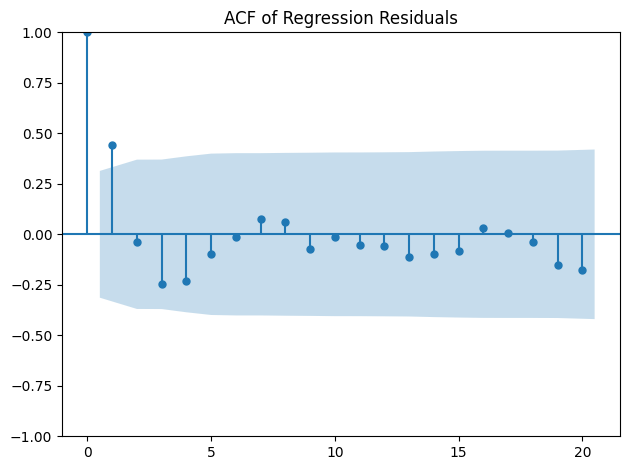

In [ ]:
residuals = model.resid

plt.figure(figsize=(8,4))
plot_acf(residuals, lags=20)
plt.title("ACF of Regression Residuals")
plt.tight_layout()
plt.show()

In [ ]:
bg_test = acorr_breusch_godfrey(model, nlags=4)
print(f"\nBreusch-Godfrey test: LM statistic = {bg_test[0]:.4f}, p-value = {bg_test[1]:.4f}")


Breusch-Godfrey test: LM statistic = 12.9079, p-value = 0.0117


In [ ]:
X_vif = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print("\nVIF results:")
print(vif_data)


VIF results:
              feature          VIF
0               const  2698.953305
1       Total_loan_gr     1.569217
2              GDP_gr     2.703337
3         cpi_inf_arm     2.375847
4        export_gr_nr     1.988663
5  Liquidity_ratio_gr     1.282942
6          usd_amd_gr     2.433541
7       RussianCrisis     2.522104
8               COVID     2.948643


In [ ]:
jb_stat, jb_pvalue = jarque_bera(model.resid)
print(f"\nJarque-Bera test: JB statistic = {jb_stat:.4f}, p-value = {jb_pvalue:.4f}")


Jarque-Bera test: JB statistic = 12.7648, p-value = 0.0017


###Final Model

In [ ]:
selected_to_lag = [
    'cpi_inf_arm'
]

for col in selected_to_lag:
    data[f"{col}_lag1"] = data[col].shift(1)


base_features = [
    'Total_loan_gr',
    'GDP_gr',
    'repo',
    'export_gr_nr',
    'RussianCrisis',
    'COVID',
    'FX_Shock',
]

lag_features = [f"{col}_lag1" for col in selected_to_lag]

final_features = list(set(base_features + lag_features))

model_data_lag = data[final_features + ["DD_log"]].dropna()

In [ ]:
X = model_data_lag[final_features]
X = sm.add_constant(X)
y = model_data_lag["DD_log"]

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DD_log   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     5.561
Date:                Wed, 28 May 2025   Prob (F-statistic):           0.000324
Time:                        14:48:29   Log-Likelihood:                -105.68
No. Observations:                  39   AIC:                             227.4
Df Residuals:                      31   BIC:                             240.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cpi_inf_arm_lag1     1.1576      0.335  

In [ ]:
residuals = model.resid
fitted = model.fittedvalues

In [ ]:
fig2 = px.histogram(residuals, nbins=30,
                    title="Histogram of Regression Residuals",
                    labels={"value": "Residuals"},
                    color_discrete_sequence=["rgb(0, 0, 153)"])
fig2.update_layout(bargap=0.1)
fig2.show()

In [ ]:
from statsmodels.stats.stattools import jarque_bera

jb_stat, jb_pvalue, _, _ = jarque_bera(model.resid)
print(f"Jarque-Bera statistic = {jb_stat:.3f}, p-value = {jb_pvalue:.3f}")

Jarque-Bera statistic = 4.367, p-value = 0.113


In [ ]:
from statsmodels.tsa.stattools import acf
acf_vals = acf(residuals, nlags=20)
lags = list(range(len(acf_vals)))

acf_df = pd.DataFrame({
    "Lag": lags,
    "Autocorrelation": acf_vals
})

fig4 = px.bar(acf_df, x="Lag", y="Autocorrelation",
              title="ACF of Residuals",
              labels={"Autocorrelation": "ACF"},
              color_discrete_sequence=["rgb(153, 0, 0)"])

fig4.add_hline(y=0, line_color='rgb(0, 0, 153)')
fig4.show()

In [ ]:
bg_test = acorr_breusch_godfrey(model, nlags=4)
print(f"Breusch-Godfrey LM stat = {bg_test[0]:.3f}, p-value = {bg_test[1]:.3f}")

Breusch-Godfrey LM stat = 13.746, p-value = 0.008


In [ ]:
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM p-value', 'F Statistic', 'F p-value']

bp_df = pd.DataFrame([bp_test], columns=labels)
bp_df.T.rename(columns={0: "Breusch-Pagan Result"}, inplace=True)
bp_df

,LM Statistic,LM p-value,F Statistic,F p-value
0,17.090982,0.016819,3.454679,0.007534


In [ ]:
robust_model = model.get_robustcov_results(cov_type='HAC', maxlags=4)
print(robust_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 DD_log   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     16.59
Date:                Wed, 28 May 2025   Prob (F-statistic):           7.04e-09
Time:                        14:48:29   Log-Likelihood:                -105.68
No. Observations:                  39   AIC:                             227.4
Df Residuals:                      31   BIC:                             240.7
Df Model:                           7                                         
Covariance Type:                  HAC                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
cpi_inf_arm_lag1     1.1576      0.451  

#VAR

In [ ]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

In [ ]:
var = [
    'DD_log',
    'Total_loan_gr',
    'cpi_inf_arm',
    'export_gr_nr',
    'Liquidity_ratio_gr',
    'usd_amd_gr'
    ]

In [ ]:
var_data = data[var].dropna()

In [ ]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"{name}: ADF = {result[0]:.4f}, p = {result[1]:.4f}")

print("ADF Stationarity Test:")
for col in var_data.columns:
    adf_test(var_data[col], col)

ADF Stationarity Test:
DD_log: ADF = -0.7049, p = 0.8455
Total_loan_gr: ADF = -3.0319, p = 0.0320
cpi_inf_arm: ADF = -2.6395, p = 0.0851
export_gr_nr: ADF = -3.5170, p = 0.0076
Liquidity_ratio_gr: ADF = -5.9655, p = 0.0000
usd_amd_gr: ADF = -3.8585, p = 0.0024


In [ ]:
def adf_test_table(df):
    results = []
    for col in df.columns:
        adf_result = adfuller(df[col])
        results.append({
            'Variable': col,
            'ADF Statistic': round(adf_result[0], 4),
            'p-value': round(adf_result[1], 4),
            'Critical Value 1%': round(adf_result[4]['1%'], 4),
            'Critical Value 5%': round(adf_result[4]['5%'], 4),
            'Critical Value 10%': round(adf_result[4]['10%'], 4),
        })
    return pd.DataFrame(results)

adf_results_df = adf_test_table(var_data)
display(adf_results_df)

,Variable,ADF Statistic,p-value,Critical Value 1%,Critical Value 5%,Critical Value 10%
0,DD_log,-0.7049,0.8455,-3.6791,-2.9679,-2.6232
1,Total_loan_gr,-3.0319,0.0320,-3.6461,-2.9541,-2.6160
2,cpi_inf_arm,-2.6395,0.0851,-3.6461,-2.9541,-2.6160
3,export_gr_nr,-3.5170,0.0076,-3.6155,-2.9413,-2.6092
4,Liquidity_ratio_gr,-5.9655,0.0000,-3.6889,-2.9720,-2.6253
5,usd_amd_gr,-3.8585,0.0024,-3.6327,-2.9485,-2.6130


In [ ]:
var_data['DD_log_diff'] = var_data['DD_log'].diff()
var_data['cpi_inf_arm_diff'] = var_data['cpi_inf_arm'].diff()

In [ ]:
var_for_var = var_data[['DD_log_diff', 'cpi_inf_arm_diff',
                        'Total_loan_gr', 'export_gr_nr',
                        'Liquidity_ratio_gr', 'usd_amd_gr']].dropna()

model = VAR(var_for_var)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [ ]:
lag_results = model.select_order(maxlags=3)
print("Optimal lag (AIC):", lag_results.selected_orders['aic'])

Optimal lag (AIC): 3


In [ ]:
selected_lag = lag_results.selected_orders['aic']

fitted_model = model.fit(selected_lag)
print(fitted_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 28, May, 2025
Time:                     16:30:47
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    23.1107
Nobs:                     35.0000    HQIC:                   19.7935
Log likelihood:          -499.760    FPE:                1.50402e+08
AIC:                      18.0447    Det(Omega_mle):     1.11506e+07
--------------------------------------------------------------------
Results for equation DD_log_diff
                           coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------------
const                       -42.067397        20.246486           -2.078           0.038
L1.DD_log_diff               -0.145493         0.237552           -0.612           0.540
L1.cpi_inf_arm_diff   

In [ ]:
def extract_significant_coefficients_v2(fitted_model, alpha=0.05):
    sig_entries = []

    for equation in fitted_model.names:

        coefs = fitted_model.params[equation]
        pvals = fitted_model.pvalues[equation]
        tvals = fitted_model.tvalues[equation]
        stderr = fitted_model.stderr[equation]


        for variable in coefs.index:
            if pvals[variable] < alpha:
                sig_entries.append({
                    'Equation': equation,
                    'Variable': variable,
                    'coef': coefs[variable],
                    'Std. Error': stderr[variable],
                    't-Stat': tvals[variable],
                    'p-value': pvals[variable]
                })

    return pd.DataFrame(sig_entries)

sig_effects = extract_significant_coefficients_v2(fitted_model)

display(sig_effects.style.format({
    'coef': '{:.4f}',
    'Std. Error': '{:.4f}',
    't-Stat': '{:.4f}',
    'p-value': '{:.4f}'
}))

,Equation,Variable,coef,Std. Error,t-Stat,p-value
0,DD_log_diff,const,-42.0674,20.2465,-2.0778,0.0377
1,DD_log_diff,L2.DD_log_diff,-0.6825,0.2251,-3.0313,0.0024
2,DD_log_diff,L3.Total_loan_gr,1.0736,0.4930,2.1775,0.0294
3,DD_log_diff,L3.export_gr_nr,0.0778,0.0322,2.4132,0.0158
4,cpi_inf_arm_diff,L1.DD_log_diff,0.2078,0.0841,2.4713,0.0135
5,cpi_inf_arm_diff,L2.Liquidity_ratio_gr,0.1500,0.0715,2.0976,0.0359
6,cpi_inf_arm_diff,L3.DD_log_diff,0.2556,0.0906,2.8207,0.0048
7,Total_loan_gr,L1.Total_loan_gr,1.6824,0.2752,6.1123,0.0000
8,Total_loan_gr,L1.usd_amd_gr,-0.5403,0.2108,-2.5628,0.0104
9,Total_loan_gr,L2.Total_loan_gr,-0.9629,0.4700,-2.0488,0.0405


In [ ]:
import plotly.express as px
import pandas as pd

corr_matrix = fitted_model.resid.corr()

corr_df = corr_matrix.reset_index().melt(id_vars='index')
corr_df.columns = ['Variable 1', 'Variable 2', 'Correlation']

fig = px.imshow(
    corr_matrix,
    text_auto=".2f",
    color_continuous_scale='Blues',
    aspect="auto",
    labels=dict(color="Correlation"),
    title="Residual Correlation Heatmap"
)

fig.update_layout(
    xaxis_title="",
    yaxis_title="",
    title_x=0.5
)

fig.show()

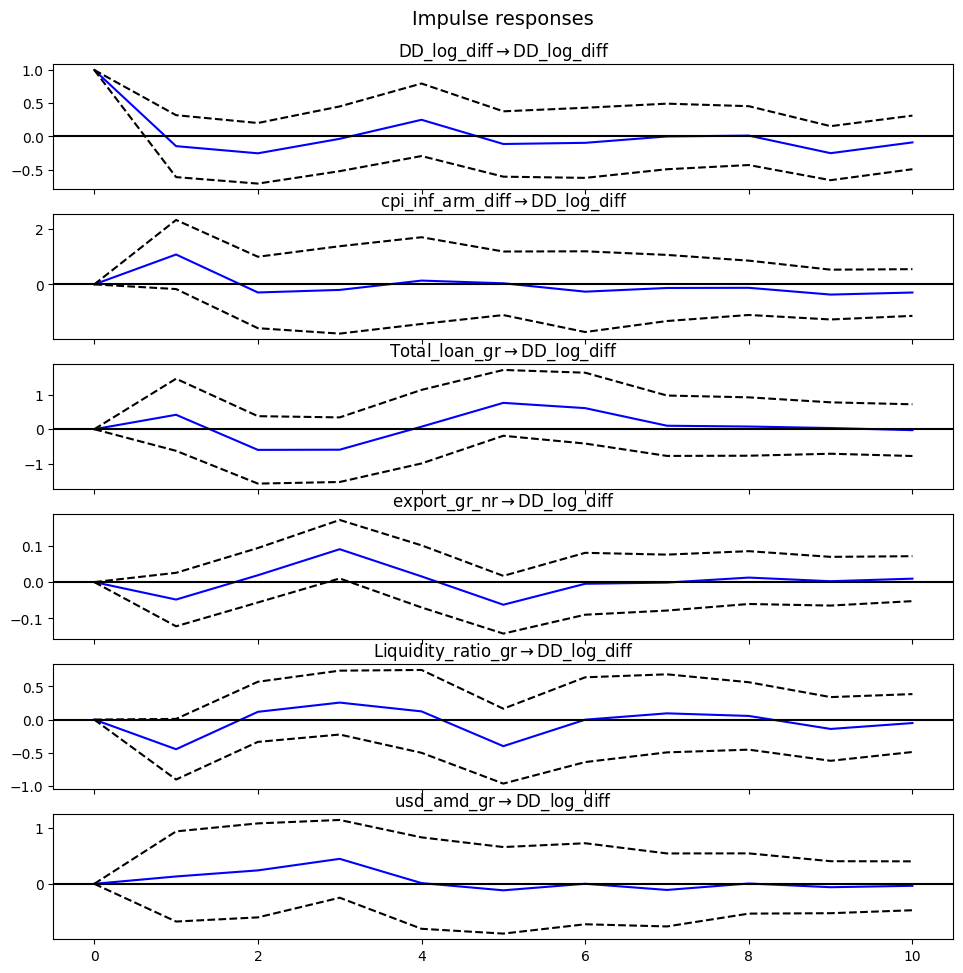

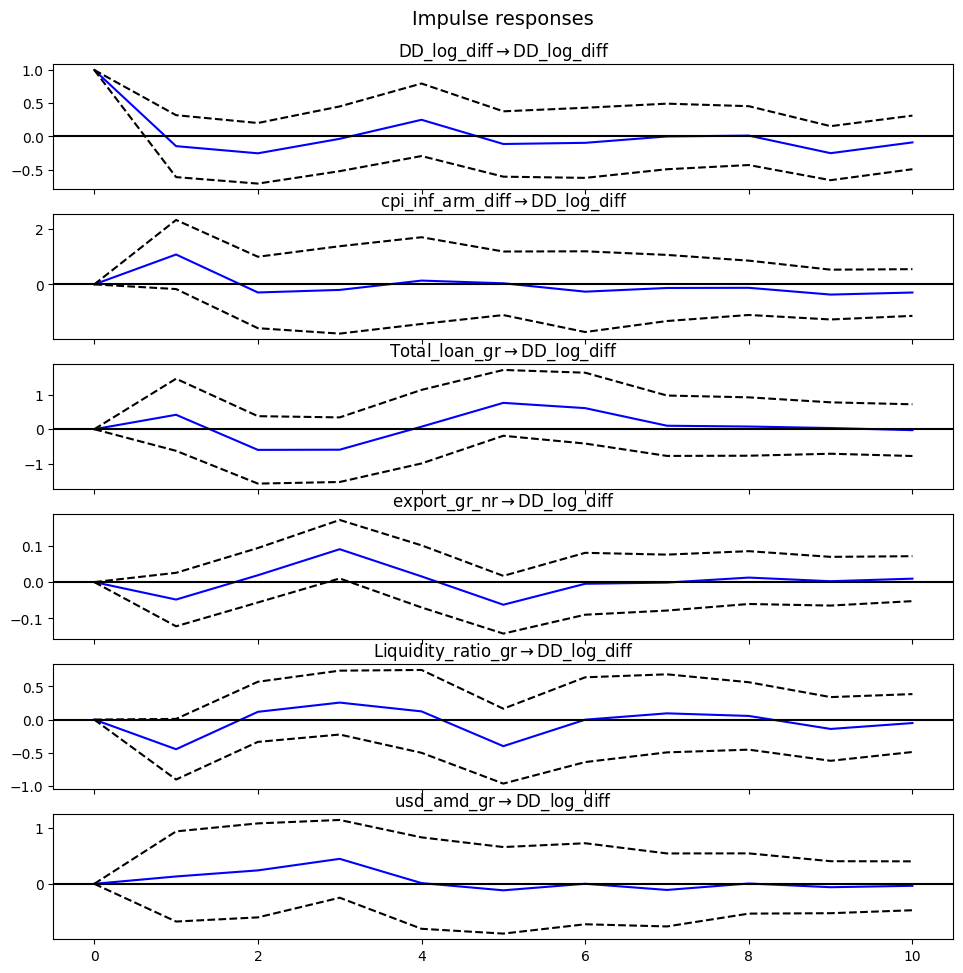

In [ ]:
irf = fitted_model.irf(10)

irf.plot(impulse=None, response='DD_log_diff', orth=False)